# ИМПОРТЫ БИБЛИОТЕК

In [7]:
import tensorflow as tf
import pandas as pd 
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random
from random import random, randrange, randint
import cv2
from PIL import *
import keras
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, UpSampling2D, Conv2D

from keras.layers import  AveragePooling2D
from keras.layers import Convolution2D, BatchNormalization, ReLU,LeakyReLU, Add, Activation, Concatenate
from glob import glob

from keras.layers import pooling


from keras.layers.pooling import MaxPool2D

In [8]:
print(f'Tensorflow version {tf.__version__}')
print(f'GPU is {"ON" if tf.config.list_physical_devices("GPU") else "OFF" }')

Tensorflow version 2.11.0
GPU is OFF


In [9]:
!dir

 Том в устройстве C имеет метку SYSTEM
 Серийный номер тома: 869E-79C2

 Содержимое папки C:\Users\drug1\Anaconda\Keras\Fasad_segment

14.04.2023  13:44    <DIR>          .
14.04.2023  13:44    <DIR>          ..
13.04.2023  17:18    <DIR>          .ipynb_checkpoints
01.04.2023  20:26             8 850 111.jpg
06.04.2023  01:28        19 752 192 best_weight.h5
05.04.2023  22:53        16 598 592 best_weight1.h5
14.04.2023  09:05            35 273 calculation_windows-Copy2.ipynb
14.04.2023  09:06            51 761 calculation_windows.ipynb
11.04.2023  16:36    <DIR>          data
10.04.2023  19:27    <DIR>          data2
12.04.2023  14:48    <DIR>          data4
14.04.2023  09:51            21 775 image_reconstruction.ipynb
14.04.2023  13:44         1 896 358 image_segmentation_cnn-Copy1.ipynb
14.04.2023  13:42         2 026 502 image_segmentation_cnn.ipynb
06.04.2023  01:30        19 752 192 last.h5
05.04.2023  22:53        16 598 592 last1.h5
11.04.2023  15:10         2 360 724 TGS UNE

# Функции для вывода изображений

In [10]:
# вывод изображения и маски
def plot_img(img, mask):

    #img = np.reshape(img,(256,256,3))
    #mask = np.reshape(mask,(256,256,3))
    #pred = np.reshape(pred,(256,256,1))
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
    ax1.imshow(img, cmap="gray")
    ax1.axis('off')
    ax2.imshow(mask,  cmap="gray")
    ax2.axis('off')
 

In [11]:
# вывод изображения в сером 
def plot_gray(img):
    plt.imshow(img,  cmap="gray")
    plt.show()



In [12]:
# вывод изображения
def plot_2(img):
    #plt.axis('off')
    plt.imshow(img)
    plt.show()

In [13]:
 # вывод случайных изображений и масок  из датасета
def random_img(img, mask):
  list_img = sorted(img)
  list_mask = sorted(mask)

  i = randrange(len(img))
 
  mask1 = plt.imread(list_mask[i])
  img1 = plt.imread(list_img[i])
  print(i)
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
  ax1.imshow(img1)
  ax1.axis('off')
  ax2.imshow(mask1,  cmap="gray")
  ax2.axis('off')


# Пути к каталогам

In [14]:
# текущее  расположение
path_dir = os.getcwd()
print(path_dir)

C:\Users\drug1\Anaconda\Keras\Fasad_segment


In [18]:
path_train_img =os.path.abspath(path_dir + '\\data\\trane\\image\\')
path_train_mask = os.path.abspath(path_dir + '\\data\\trane\\mask\\')
path_val_img = os.path.abspath(path_dir + '\\data\\val\\val_img\\')
path_val_mask = os.path.abspath(path_dir + '\\data\\val\\val_mask\\')
path_test = os.path.abspath(path_dir + '\\data\\test_fasads\\')

image1 =os.path.abspath(path_dir + '\\data5\\data2\\train\\image\\')
mask1 = os.path.abspath(path_dir + '\\data5\\data2\\train\\mask\\')

image2 = os.path.abspath(path_dir + '\\data5\\data2\\val\\image\\')
mask2 = os.path.abspath(path_dir + '\\data5\\data2\\val\\image\\')

image3 = os.path.abspath(path_dir + '\\data5\\data2\\test\\image\\')
mask3 = os.path.abspath(path_dir + '\\data5\\data2\\test\\image\\')


print(image3)
print(mask3)
print(image1)
print(mask1)

C:\Users\drug1\Anaconda\Keras\Fasad_segment\data5\data2\test\image
C:\Users\drug1\Anaconda\Keras\Fasad_segment\data5\data2\test\image
C:\Users\drug1\Anaconda\Keras\Fasad_segment\data5\data2\train\image
C:\Users\drug1\Anaconda\Keras\Fasad_segment\data5\data2\train\mask


# Просмотр случайных изображений из тренировачного набора

# (*можно пропустить*)

In [19]:
train_img = np.array(sorted(glob(os.path.join(image1, '*'))))
print(len(train_img))

train_mask = np.array(sorted(glob(os.path.join(mask1, '*'))))
print(len(train_mask))

val_img = np.array(sorted(glob(os.path.join(mask2, '*'))))
print(len(val_img))

val_mask = np.array(sorted(glob(os.path.join(mask2, '*'))))
print(len(val_mask))

test_img = np.array(sorted(glob(os.path.join(image3, '*'))))
print(len(test_img))

test_mask = np.array(sorted(glob(os.path.join(mask3, '*'))))
print(len(test_mask))

2574
2574
1030
1030
52
52


761
294
261
867
191


<Figure size 1000x1000 with 0 Axes>

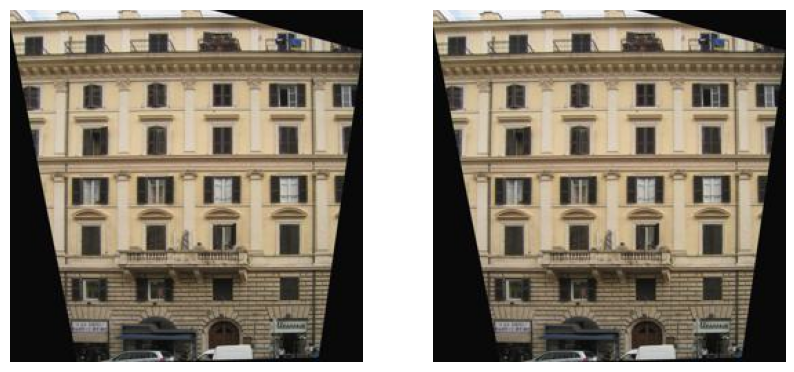

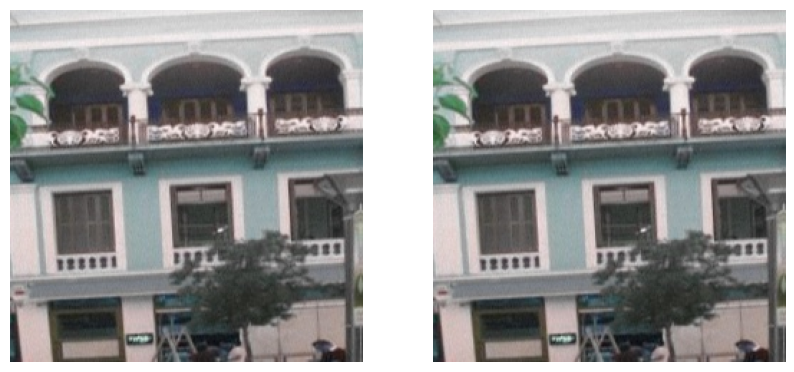

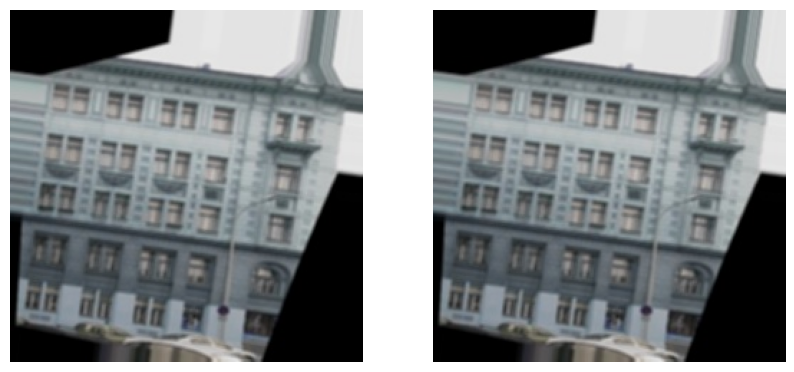

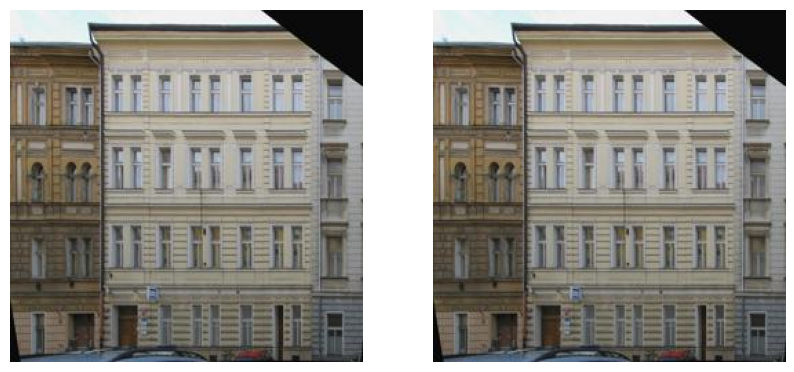

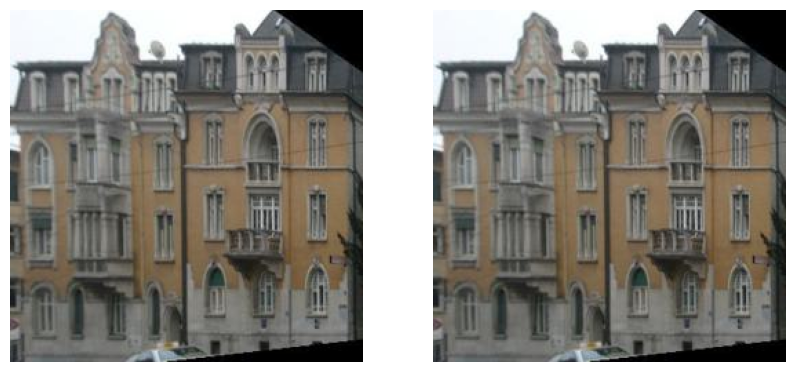

In [20]:
plt.figure(figsize=(10,10))
list_img = val_img
list_mask = val_mask
for i in range(5):
    random_img(list_img, list_mask)
    
    

случайные изображения датасета  и соответствующие маски окон

# МОДЕЛЬ  СЕТИ

параметры

In [21]:
x_size = 256
y_size = 256

batch_size = 20

In [22]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

модель сети

In [23]:
input_layer = Input(shape=(x_size, y_size, 1))

conv_1_1 = Conv2D(16, (3, 3), padding='same')(input_layer)
conv_1_1 = Activation('relu')(conv_1_1)

conv_1_2 = Conv2D(16, (3, 3), padding='same')(conv_1_1)
conv_1_2 = Activation('relu')(conv_1_2)

pool_1 = MaxPool2D(2)(conv_1_2)

conv_2_1 = Conv2D(32, (3, 3), padding='same')(pool_1)
conv_2_1 = Activation('relu')(conv_2_1)

conv_2_2 = Conv2D(32, (3, 3), padding='same')(conv_2_1)
conv_2_2 = Activation('relu')(conv_2_2)

pool_2 = MaxPool2D(2)(conv_2_2)

conv_3_1 = Conv2D(64, (3, 3), padding='same')(pool_2)
conv_3_1 = Activation('relu')(conv_3_1)

conv_3_2 = Conv2D(64, (3, 3), padding='same')(conv_3_1)
conv_3_2 = Activation('relu')(conv_3_2)

pool_3 = MaxPool2D(2)(conv_3_2)

conv_4_1 = Conv2D(128, (3, 3), padding='same')(pool_3)
conv_4_1 = Activation('relu')(conv_4_1)

conv_4_2 = Conv2D(128, (3, 3), padding='same')(conv_4_1)
conv_4_2 = Activation('relu')(conv_4_2)

pool_4 = MaxPool2D(2)(conv_4_2)

conv_5_1 = Conv2D(256, (3, 3), padding='same')(pool_4)
conv_5_1 = Activation('relu')(conv_5_1)

conv_5_2 = Conv2D(256, (3, 3), padding='same')(conv_5_1)
conv_5_2 = Activation('relu')(conv_5_2)

conv_5_3 = Conv2D(256, (3, 3), padding='same')(conv_5_2)
conv_5_3 = Activation('relu')(conv_5_3)


pool_5 = MaxPool2D(2)(conv_5_3)

up_1 = UpSampling2D(2, interpolation='bilinear')(pool_5)
#conc_1 = Concatenate()([conv_5_3, up_1])

conv_up_1_1 = Conv2D(256, (3, 3), padding='same')(up_1)
conv_up_1_1 = Activation('relu')(conv_up_1_1)

conv_up_1_2 = Conv2D(256, (3, 3), padding='same')(conv_up_1_1)
conv_up_1_2 = Activation('relu')(conv_up_1_2)

conv_up_1_3 = Conv2D(256, (3, 3), padding='same')(conv_up_1_2)
conv_up_1_3 = Activation('relu')(conv_up_1_3)

up_2 = UpSampling2D(2, interpolation='bilinear')(conv_up_1_3)
#conc_2 = Concatenate()([conv_4_2, up_2])

conv_up_2_1 = Conv2D(128, (3, 3), padding='same')(up_2)
conv_up_2_1 = Activation('relu')(conv_up_2_1)

conv_up_2_2 = Conv2D(128, (3, 3), padding='same')(conv_up_2_1)
conv_up_2_2 = Activation('relu')(conv_up_2_2)

up_3 = UpSampling2D(2, interpolation='bilinear')(conv_up_2_2)
#conc_3 = Concatenate()([conv_3_2, up_3])

conv_up_3_1 = Conv2D(64, (3, 3), padding='same')(up_3)
conv_up_3_1 = Activation('relu')(conv_up_3_1)

conv_up_3_2 = Conv2D(64, (3, 3), padding='same')(conv_up_3_1)
conv_up_3_2 = Activation('relu')(conv_up_3_2)

up_4 = UpSampling2D(2, interpolation='bilinear')(conv_up_3_2)
#conc_4 = Concatenate()([conv_2_2, up_4])

conv_up_4_1 = Conv2D(32, (3, 3), padding='same')(up_4)
conv_up_4_1 = Activation('relu')(conv_up_4_1)

conv_up_4_2 = Conv2D(32, (3, 3), padding='same')(conv_up_4_1)
conv_up_4_2 = Activation('relu')(conv_up_4_2)


up_5 = UpSampling2D(2, interpolation='bilinear')(conv_up_4_2)
#conc_5 = Concatenate()([conv_1_2, up_5])

conv_up_5_1 = Conv2D(16, (3, 3), padding='same')(up_5)
conv_up_5_1 = Activation('relu')(conv_up_5_1)

conv_up_5_2 = Conv2D(1, (3, 3), padding='same')(conv_up_5_1)
output_layer = Activation('sigmoid')(conv_up_5_2)


model = Model(inputs=input_layer, outputs=output_layer)

генератор  батчей

In [24]:
def keras_generator(tr_img, tr_mask, size_data, batch_size=10):
  while True:
    x_bath = []
    y_bath = []

    for i in range(batch_size):
      rand = randrange(size_data)

      img = cv2.imread(tr_img[rand])
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      mask = cv2.imread(tr_mask[rand])

      img = cv2.resize(img, (256, 256))
      mask = cv2.resize(mask, (256, 256))
      x_bath +=[img]
      y_bath +=[mask]

    x_bath = np.array(x_bath) / 255.
    y_bath = np.array(y_bath) / 255.
    x_bath = np.reshape(x_bath, (batch_size, x_size, y_size, 1))

    yield x_bath, y_bath

In [26]:
train_img = np.array(sorted(glob(os.path.join(image1, '*'))))
print(len(train_img))

train_mask = np.array(sorted(glob(os.path.join(mask1, '*'))))
print(len(train_mask))

val_img = np.array(sorted(glob(os.path.join(mask2, '*'))))
print(len(val_img))

val_mask = np.array(sorted(glob(os.path.join(mask2, '*'))))
print(len(val_mask))

test_img = np.array(sorted(glob(os.path.join(image3, '*'))))
print(len(test_img))

test_mask = np.array(sorted(glob(os.path.join(mask3, '*'))))

2574
2574
1030
1030
52


проверим генератор

In [27]:
for x, y in keras_generator(train_img, train_mask, 10):
  
  break

x[0].shape

(256, 256, 1)

выведем изображение с генератора

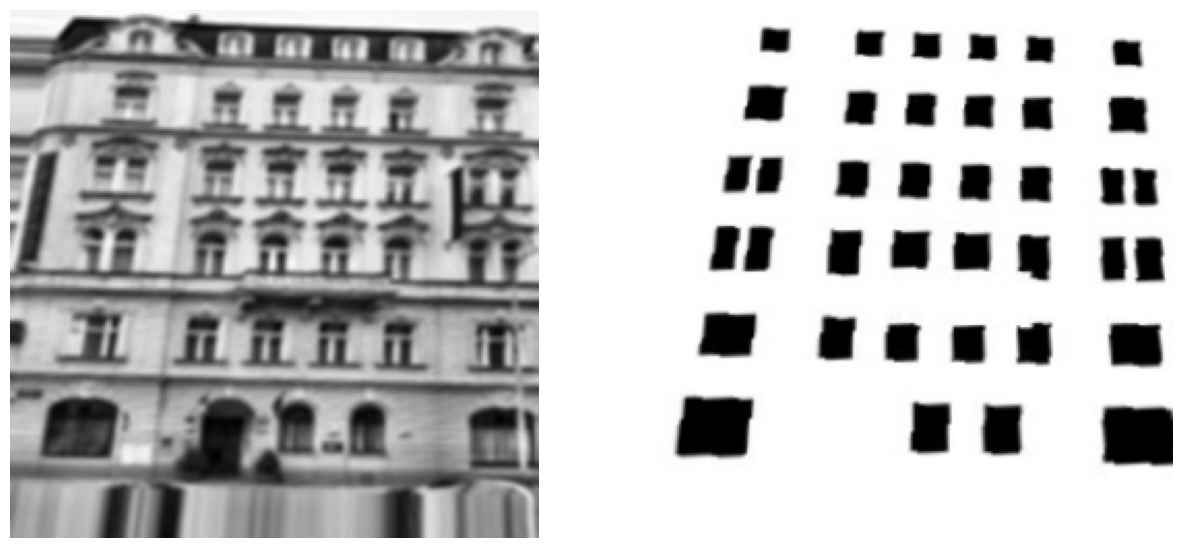

In [28]:
plot_img(x[3], y[3])

In [29]:
x[3].shape

(256, 256, 1)

# Обучение модели с генератором

In [30]:
model.load_weights(path_dir + '\\best_weight1.h5')

оптимизатор

In [31]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1)

Callback

In [32]:
from keras import callbacks
from keras.callbacks import Callback

best_weight = callbacks.ModelCheckpoint('best_weight1.h5',
                                        monitor='loss',
                                        verbose=0,
                                        save_best_only=True,
                                        save_weights_only=True,
                                        mode='auto',
                                        save_freq=5)

last_w = callbacks.ModelCheckpoint('last1.h5',
                                        monitor='val_loss',
                                        verbose=0,
                                        save_best_only=False,
                                        save_weights_only=True,
                                        mode='auto',
                                        save_freq=5)

callbacks = [best_weight, last_w]

обучение сети

In [33]:
size_1 = len(train_img)
size_2 = len(val_img)
model.compile(optimizer=adam, loss="mse", metrics=['accuracy'])

ff = model.fit(keras_generator(train_img, train_mask, size_1, batch_size),
                    steps_per_epoch=100,
                    epochs=10,
                    verbose=1,
                    callbacks=callbacks,
                    validation_data=keras_generator(val_img, val_mask, size_2, batch_size),
                    validation_steps=50,
                    class_weight=None,
                    max_queue_size=10,
                    workers=1,
                    use_multiprocessing=False,
                    shuffle=True,
                    initial_epoch=0)
                    
for key in ff.history:
    print(key)  



Epoch 1/10
100/100 [==============================] - 358s 4s/step - loss: 0.2030 - accuracy: 0.6451 - val_loss: 0.0680 - val_accuracy: 0.0068
Epoch 2/10
100/100 [==============================] - 354s 4s/step - loss: 0.2012 - accuracy: 0.6452 - val_loss: 0.0689 - val_accuracy: 0.0055
Epoch 3/10
100/100 [==============================] - 354s 4s/step - loss: 0.1989 - accuracy: 0.6496 - val_loss: 0.0699 - val_accuracy: 0.0083
Epoch 4/10
100/100 [==============================] - 354s 4s/step - loss: 0.1963 - accuracy: 0.6502 - val_loss: 0.0712 - val_accuracy: 0.0062
Epoch 5/10
100/100 [==============================] - 363s 4s/step - loss: 0.1928 - accuracy: 0.6482 - val_loss: 0.0730 - val_accuracy: 0.0066
Epoch 6/10
100/100 [==============================] - 362s 4s/step - loss: 0.1890 - accuracy: 0.6474 - val_loss: 0.0741 - val_accuracy: 0.0074
Epoch 7/10
100/100 [==============================] - 365s 4s/step - loss: 0.1849 - accuracy: 0.6508 - val_loss: 0.0775 - val_accuracy: 0.0066

In [37]:
#model.summary()

In [38]:
test_img[5]

'C:\\Users\\drug1\\Anaconda\\Keras\\Fasad_segment\\data5\\data2\\test\\image\\2005.jpg'

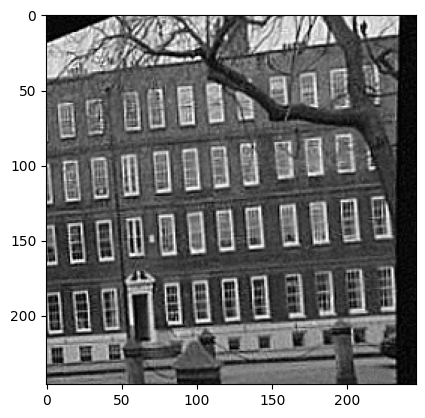

In [41]:
img1 = cv2.imread(test_img[0])
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img.shape
plot_gray(img)

In [42]:
img = cv2.resize(img, dsize = (256, 256))
img_batch = np.expand_dims(img, 0) 
img_batch.shape

(1, 256, 256)

In [45]:
id = 2

pred = model.predict(img_batch)



1/1 [==============================] - 0s 55ms/step


In [46]:
pred

array([[[[0.5657607 ],
         [0.5716241 ],
         [0.577332  ],
         ...,
         [0.57748383],
         [0.5752896 ],
         [0.55331105]],

        [[0.570914  ],
         [0.59201366],
         [0.59963495],
         ...,
         [0.60072976],
         [0.59541595],
         [0.5763908 ]],

        [[0.5734615 ],
         [0.59887284],
         [0.60761434],
         ...,
         [0.6090695 ],
         [0.6049038 ],
         [0.581105  ]],

        ...,

        [[0.57028645],
         [0.59772843],
         [0.604978  ],
         ...,
         [0.6080293 ],
         [0.60568094],
         [0.5806807 ]],

        [[0.5652409 ],
         [0.5912012 ],
         [0.5963324 ],
         ...,
         [0.5980023 ],
         [0.59735405],
         [0.57583547]],

        [[0.5516744 ],
         [0.57268083],
         [0.57523334],
         ...,
         [0.5754813 ],
         [0.57662946],
         [0.5669134 ]]]], dtype=float32)

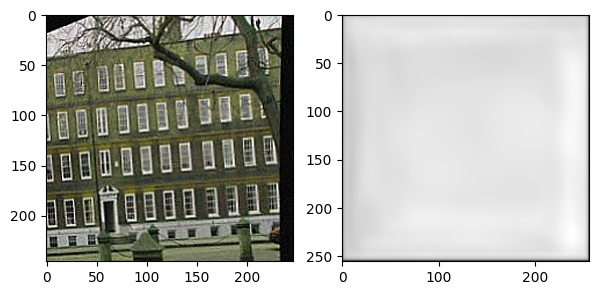

In [44]:
pred = np.squeeze(pred)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,7))
axes[0].imshow(img1)
axes[1].imshow(pred,  cmap="gray")

plt.show()